

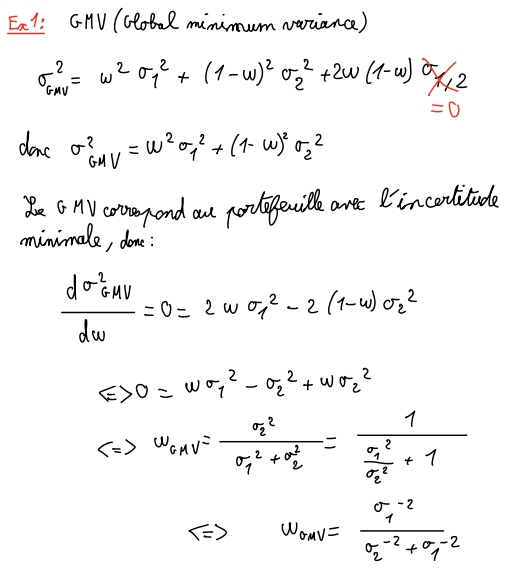

Exercise 2:

In [4]:
import numpy as np

mu = np.array([10,8,6])/100 # en %
sig = np.array([20,15,10])/100 # en %
corr = np.array([[1.0, 0.6, -0.2],
                 [0.6, 1.0, -0.1],
                 [-0.2, -0.1, 1.0]])

cov = np.diag(sig) @ corr @ np.diag(sig)
print("Covariance matrix:\n", cov)

w_EW = np.array([1/3, 1/3, 1/3])

mean_return_EW = w_EW @ mu
volatility_EW = np.sqrt(w_EW.T @ cov @ w_EW)
print("Mean return (EW): ", mean_return_EW*100, "%")
print("Volatility (EW): ", volatility_EW*100, "%")

w_birth = np.array([18/31, 10/12, 1-18/31-10/12])
mean_return_birth = w_birth @ mu
volatility_birth = np.sqrt(w_birth.T @ cov @ w_birth)
print("Mean return (Birth): ", mean_return_birth*100, "%")
print("Volatility (Birth): ", volatility_birth*100, "%")

Covariance matrix:
 [[ 0.04    0.018  -0.004 ]
 [ 0.018   0.0225 -0.0015]
 [-0.004  -0.0015  0.01  ]]
Mean return (EW):  7.999999999999999 %
Volatility (EW):  10.408329997330663 %
Mean return (Birth):  9.989247311827958 %
Volatility (Birth):  22.627866012247804 %


Exercise 3:

In [5]:
e=np.array([1,1,1])
w_GMV = np.linalg.inv(cov) @ e / (e.T @ np.linalg.inv(cov) @ e)
print("Weights (GMV): ", w_GMV)

mean_return_GMV = w_GMV @ mu
volatility_GMV = np.sqrt(w_GMV.T @ cov @ w_GMV)
print("Mean return (GMV): ", mean_return_GMV*100, "%")
print("Volatility (GMV): ", volatility_GMV*100, "%")

Weights (GMV):  [0.11929544 0.2113691  0.66933547]
Mean return (GMV):  6.899919935948759 %
Volatility (GMV):  7.680572436632799 %


Ex 4:

In [6]:
risk_free_rate = 0.015
w_MSR = np.linalg.inv(cov) @ (mu - risk_free_rate * e)
w_MSR = w_MSR / np.sum(w_MSR)
print("Weights (MSR): ", w_MSR)
mean_return_MSR = w_MSR @ mu
volatility_MSR = np.sqrt(w_MSR.T @ cov @ w_MSR)
print("Mean return (MSR): ", mean_return_MSR*100, "%")
print("Volatility (MSR): ", volatility_MSR*100, "%")


Weights (MSR):  [0.20676106 0.19037734 0.60286159]
Mean return (MSR):  7.207798947290383 %
Volatility (MSR):  7.89649314342586 %


In [ ]:
print("\nVolatility comparison:")
print("EW Volatility: ", volatility_EW*100, "%")
print("GMV Volatility: ", volatility_GMV*100, "%")
print("MSR Volatility: ", volatility_MSR*100, "%")


Volatility comparison:
EW Volatility:  10.408329997330663 %
GMV Volatility:  7.680572436632799 %
MSR Volatility:  7.89649314342586 %


Comme prévu le GMV a la plus faible volatilité, celle du MSR est plus faible que le EW mais il faut surtout nous intéresser au sharp ratio.

Ex 5

In [8]:
lambda_MSR = (mean_return_MSR - risk_free_rate) / volatility_MSR
lambda_EW = (mean_return_EW - risk_free_rate) / volatility_EW
lambda_GMV = (mean_return_GMV - risk_free_rate) / volatility_GMV

print("\nSharpe ratio comparison:")
print("EW Sharpe ratio: ", lambda_EW)
print("GMV Sharpe ratio: ", lambda_GMV)
print("MSR Sharpe ratio: ", lambda_MSR)


Sharpe ratio comparison:
EW Sharpe ratio:  0.6244997998398397
GMV Sharpe ratio:  0.7030621715373224
MSR Sharpe ratio:  0.7228270630542306


Comme prévu le MSR a le meilleur sharp ratio

In [9]:
print("MSR/GMV")
print("lambda ratio: ", lambda_MSR/lambda_GMV, "sigma ratio: ", volatility_MSR/volatility_GMV,"\n", "mean_return ration", mean_return_MSR/mean_return_GMV)



MSR/GMV
lambda ratio:  1.0281125799638602 sigma ratio:  1.0281125799638604 
 mean_return ration 1.0446206643264897


On remarque que $\frac{\lambda_{MSR}}{\lambda_{GMV}} = \frac{\sigma_{MSR}}{\sigma_{GMV}}$, mais je ne sais pas quoi en déduire pour le moment.


ex 6 
1.

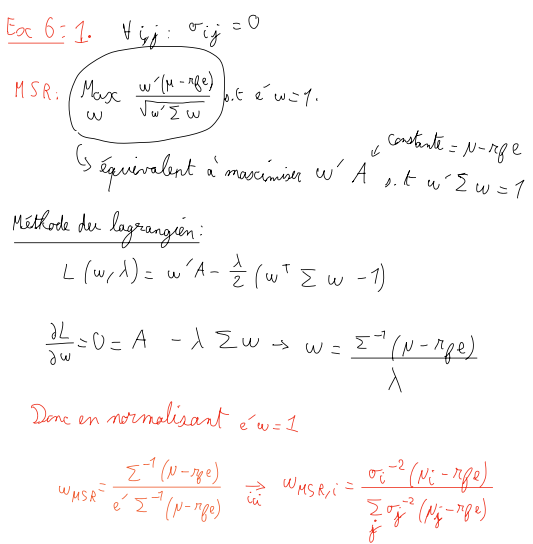

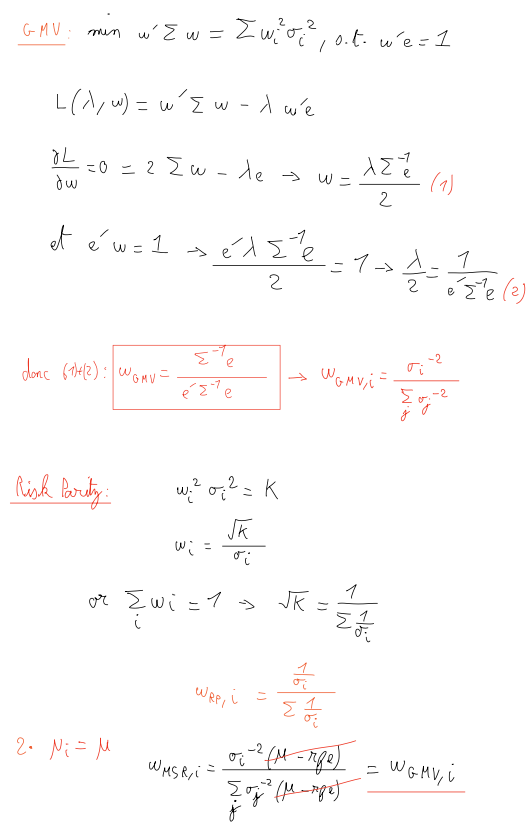

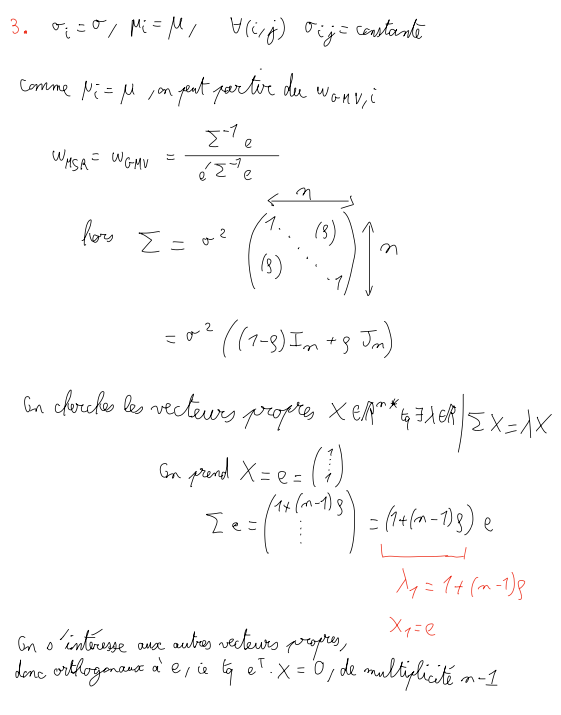

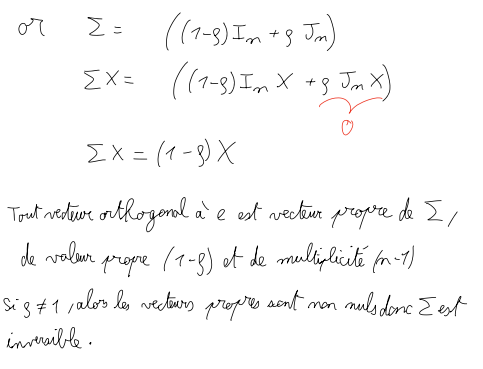

Puis je n'ai pas encore réussi, mais au vu de l'homogénéité des assets le poids doit être 1/n.

ex 7:

1.

In [10]:
sigma_1=0.15
sigma_2=0.2
sigma_3=0.25

w_1=0.2
w_2=0.5
w_3=0.3

ENC= 1/(w_1**2 + w_2**2 + w_3**2)
print("\nEffective Number of Constituents (ENC): ", ENC)


Effective Number of Constituents (ENC):  2.6315789473684212


Minimum =1, max=3, on a un portefeuille quand même assez diversifié

2.

In [11]:
portefeuille_variance= w_1**2 * sigma_1**2 + w_2**2 * sigma_2**2 + w_3**2 * sigma_3**2
portefeuille_std= np.sqrt(portefeuille_variance)
print("portefeuille variance: ", portefeuille_variance)
print("portefeuille standard deviation: ", portefeuille_std)


portefeuille variance:  0.016525
portefeuille standard deviation:  0.1285496013218244


3.

In [12]:
contribution_variance_1= (w_1**2 * sigma_1**2) / portefeuille_variance
print("contribution variance asset 1: ", contribution_variance_1)
contribution_variance_2= (w_2**2 * sigma_2**2) / portefeuille_variance
print("contribution variance asset 2: ", contribution_variance_2)
contribution_variance_3= (w_3**2 * sigma_3**2) / portefeuille_variance
print("contribution variance asset 3: ", contribution_variance_3)

contribution variance asset 1:  0.05446293494704993
contribution variance asset 2:  0.6051437216338881
contribution variance asset 3:  0.34039334341906197


4.

GMV_portfolio, ie le portefeuille avec le minimum de variance

In [13]:
w_GMV = np.linalg.inv(np.diag([sigma_1**2, sigma_2**2, sigma_3**2])) @ e / (e.T @ np.linalg.inv(np.diag([sigma_1**2, sigma_2**2, sigma_3**2])) @ e)
print("Weights (GMV): ", w_GMV)

Weights (GMV):  [0.52015605 0.29258778 0.18725618]


5.
Risk Parity, ie $w_i^2*\sigma_i^2 $ = constante, ie $w_i*\sigma_i $ = constante, et comme la somme des poids du portefeuille vaut 1 alors on a $w_i=\frac{1/\sigma_i}{\sum 1/\sigma_i}$

In [14]:
w_1riskparity=(1/sigma_1)/((1/sigma_1)+(1/sigma_2)+(1/sigma_3))
w_2riskparity=(1/sigma_2)/((1/sigma_1)+(1/sigma_2)+(1/sigma_3))
w_3riskparity=(1/sigma_3)/((1/sigma_1)+(1/sigma_2)+(1/sigma_3))
print("Weights (Risk Parity): ", np.array([w_1riskparity, w_2riskparity, w_3riskparity]))


Weights (Risk Parity):  [0.42553191 0.31914894 0.25531915]


Exercice 8:
1.

In [23]:
sigma_1=0.15
sigma_2=0.2
rho_12=0.6
cov_12= rho_12 * sigma_1 * sigma_2
e= np.array([1,1])

cov_matrix= np.array([[sigma_1**2, cov_12],
                      [cov_12, sigma_2**2]])
inv_cov_matrix= np.linalg.inv(cov_matrix)
print("Inverse Covariance Matrix:\n", inv_cov_matrix)

Inverse Covariance Matrix:
 [[ 69.44444444 -31.25      ]
 [-31.25        39.0625    ]]


2.

In [21]:
GMV_portfolio_weights= inv_cov_matrix @ e / (e.T @ inv_cov_matrix @ e)
GMV_portfolio_weights

array([0.83018868, 0.16981132])

3.

4.
Maximum diversification portfolio:
Maximise le Diversification Index

$$
DI=\frac{\sum w_i\sigma_i}{\sqrt{\sum w_i w_j \sigma_{ij}}}
$$
ici on a 
$$
DI=\frac{w\sigma_1+(1-w)\sigma_2}{\sqrt{w^2\sigma_1^2+(1-w)^2\sigma_2^2+2w(1-w)\sigma_1\sigma_2\rho}}
$$

au maximum
$$
\frac{dDI}{dw}=0
$$
donc ...

Dérivée insupportable je ne sais pas si c'est le bon chemin.

5.

Risk Parity, ie $w(w*\sigma_1^2 + (1-w)\sigma_{12})=(1-w)((1-w)*\sigma_1^2 + w\sigma_{12})$ donc $w^2*\sigma_1^2=(1-w)^2*\sigma_2^2$

D'après 7.5 on a $w_i=\frac{1/\sigma_i}{\sum 1/\sigma_i}$, donc on obtient:

$$
w=\frac{\sigma_2}{\sigma_1 +\sigma_2}
$$